# Преобразования Фурье для обработки сигналов с помощью Python

https://proglib.io/p/preobrazovaniya-fure-dlya-obrabotki-signalov-s-pomoshchyu-python-2020-11-03

how to construct a Fourier transform of data with numpy and plot the spectrum with pyplot.
https://web.physics.utah.edu/~detar/lessons/python/numpy_fft/numpy_fft.html

### Анализ частотного спектра

Гармонические функции

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Простая синусоида представляет собой одну частотную полосу:

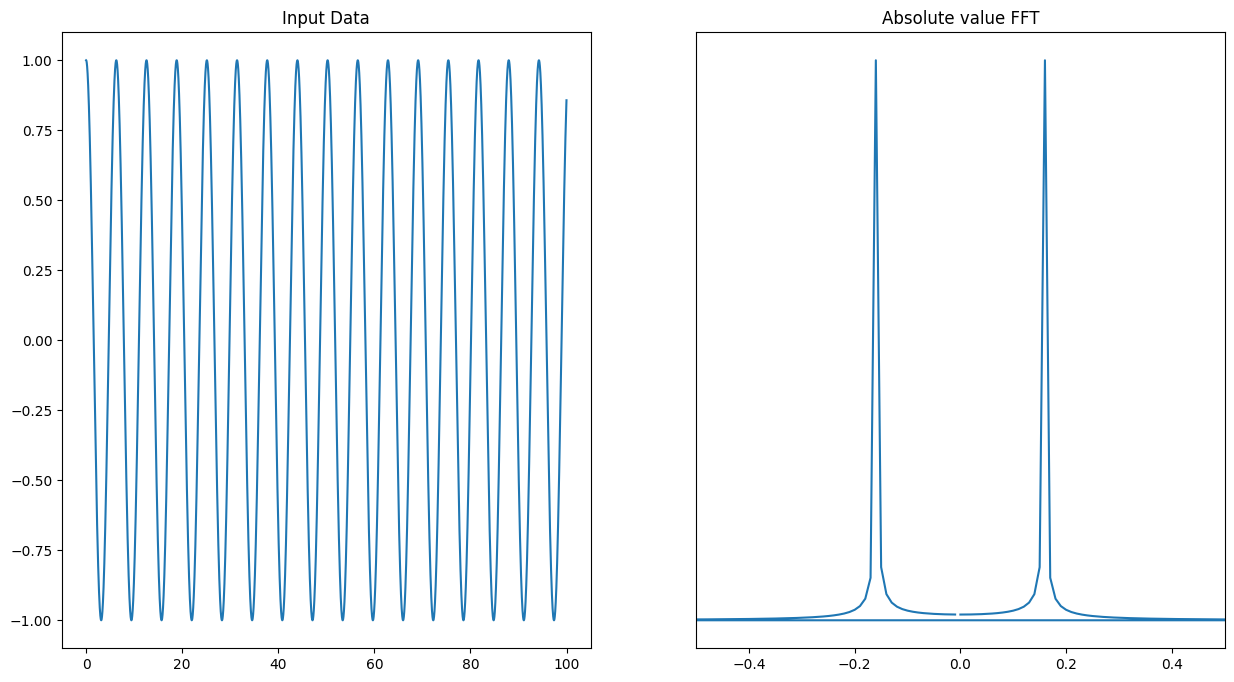

In [12]:
length = 100
step_real = 0.01

x = np.arange(0, length, step_real)
y = np.cos(x)

f = np.fft.fft(y)
fx = np.fft.fftfreq(len(x), step_real)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.plot(x, y)
ax1.set_title('Input Data')

ax2.plot(fx, np.abs(f)) # или для модуля np.abs(f) вместо f.real
ax2.set_title('Absolute value FFT')
ax2.set_yticks([])
ax2.set_xlim(-freq_lim,freq_lim)


plt.show()

Сумма несколких гармонических функций и постоянной состтавляющей представляют собой несколько зеркальных частотных пиков и пик на нулевой частоте (постоянная составляющая):

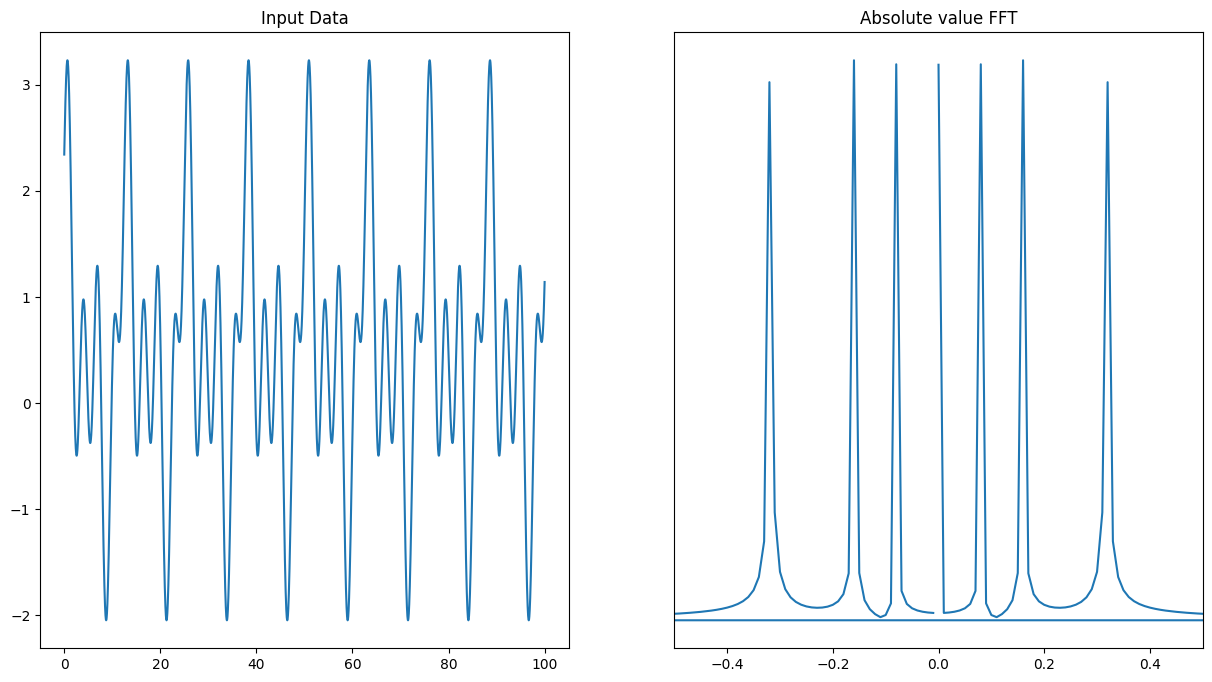

In [13]:
length = 100
step_real = 0.01

x = np.arange(0, length, step_real)
y = np.cos(x) + 0.5 + np.sin(2 * x) + np.sin(0.5 * x + 1)

f = np.fft.fft(y)
fx = np.fft.fftfreq(len(x), step_real)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.plot(x, y)
ax1.set_title('Input Data')

ax2.plot(fx, np.abs(f)) # или для модуля np.abs(f) вместо f.real
ax2.set_title('Absolute value FFT')
ax2.set_yticks([])
ax2.set_xlim(-freq_lim,freq_lim)


plt.show()

### Задание:

Последовательно усложняя функцию от одиночного синуса, и добавляя постоянную составляющую и тригонометрические функции с другим множителем у координаты х и отличным от нуля смещением, изучить изменение частотного спектра сигнала.

## Частота дискретизации

Для корректного анализа частота оцифровки должна быть чем вдвое выше минимальной интересуемой частоты в исследуемом сигнале.

Попробуем изменить частоту выборки и посморим как изменится сигнал относительно исходной (в нашем суммарном сигнале минимальная частота соответствует функции sin(2 * x) и равна 2, то есть половинный шаг - 0.5)

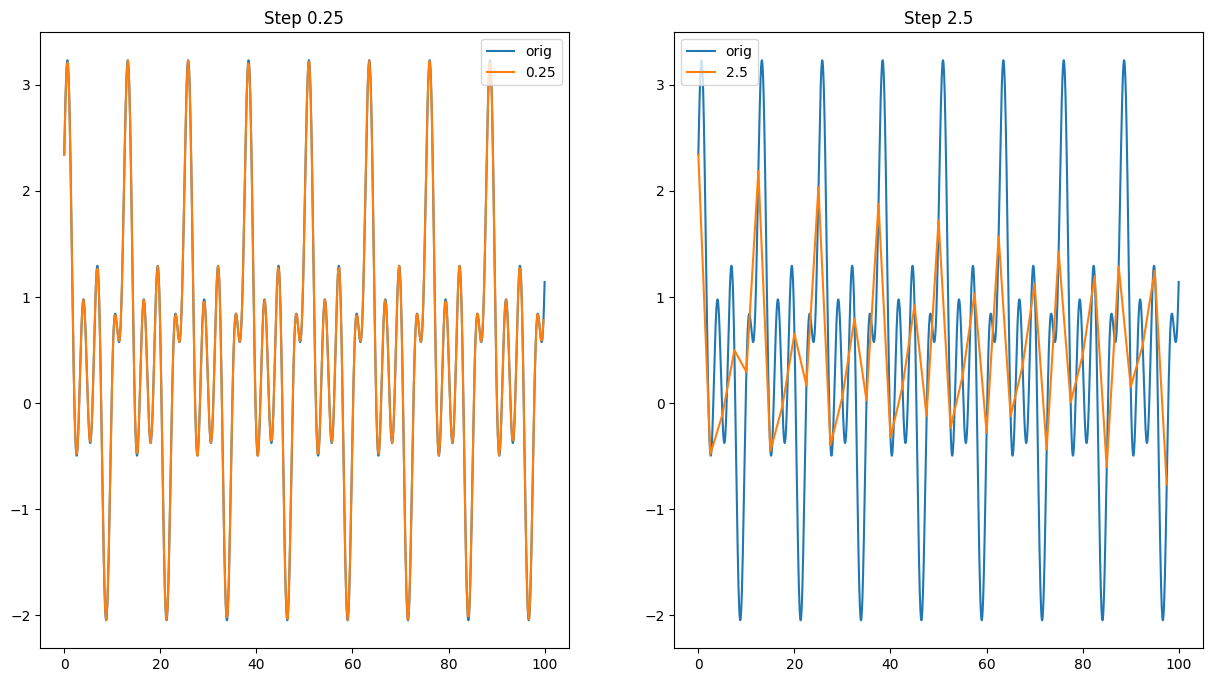

In [19]:
length = 100
step_real = 0.01
step_wider = 2.5
step_shorter = 0.25

x = np.arange(0, length, step_real)
y = np.cos(x) + 0.5 + np.sin(2 * x) + np.sin(0.5 * x + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.plot(x, y, label='orig')
x1 = np.arange(0, length, step_shorter)
y1 = np.cos(x1) + 0.5 + np.sin(2 * x1) + np.sin(0.5 * x1 + 1)
ax1.plot(x1, y1, label=f'{step_shorter}')
ax1.set_title(f'Step {step_shorter}')
ax1.legend()

ax2.plot(x, y, label='orig')
x1 = np.arange(0, length, step_wider)
y1 = np.cos(x1) + 0.5 + np.sin(2 * x1) + np.sin(0.5 * x1 + 1)
ax2.plot(x1, y1, label=f'{step_wider}')
ax2.set_title(f'Step {step_wider}')
ax2.legend()

plt.show()

Видно что форма сигнала исказилась.

И если провести частотный анализ - то будет видно, что во втором случае пропали  высокие частоты:

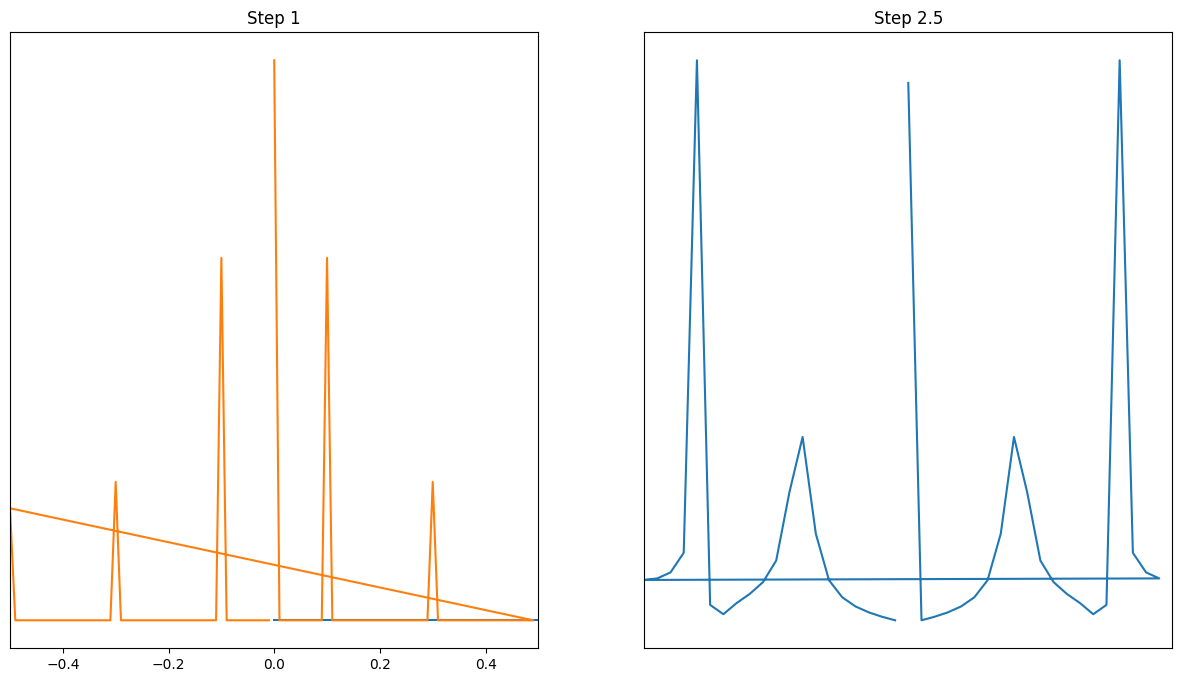

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.plot(x, y)
ax1.set_title('Input Data')

f = np.fft.fft(y)
fx = np.fft.fftfreq(len(x), step_real)
ax1.plot(fx, np.abs(f)) # или для модуля np.abs(f) вместо f.real
ax1.set_title(f'Step {step_real}')
ax1.set_yticks([])
ax2.set_xticks([])
ax1.set_xlim(-freq_lim,freq_lim)

f = np.fft.fft(y1)
fx = np.fft.fftfreq(len(x1))
ax2.plot(fx, np.abs(f)) # или для модуля np.abs(f) вместо f.real
ax2.set_title(f'Step {step_wider}')
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_xlim(-freq_lim,freq_lim)

plt.show()

### Задание

Проследить как по мере увеличения шага выборки (или уменьшения частоты выборки) изменяется частотный спектр функция, полученная дискретизацией. Предположить, исходя их критерия Найквиста (теоремы Котельникова), какой наименьший допустимый шаг выборки. Убедиться в этом, сравнивая формы функций и анализируя частотный спектр.

#### Меандр

Спектр периодического сигнала любой формы может быть представлен в ввиде суммы гармонических сигналов, сооветственно эти частотные компоненты будут видны и на спектре.

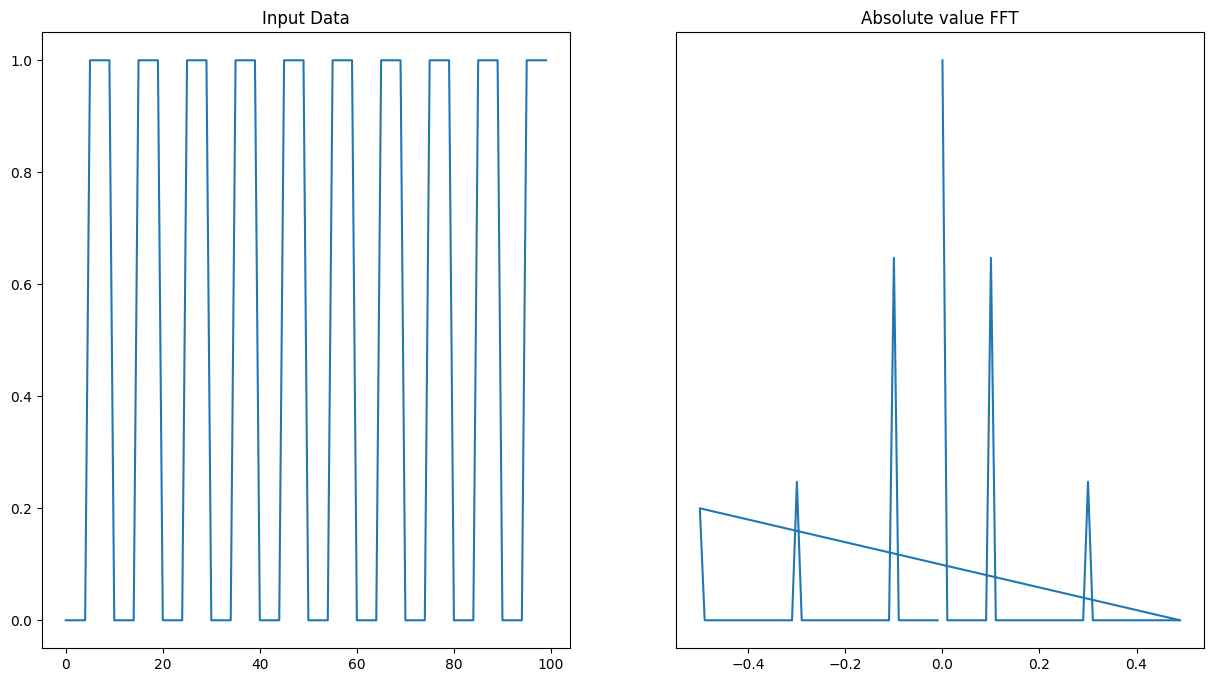

In [74]:
length = 100
step_real = 1
squareimpulse = [0,0,0,0,0,1,1,1,1,1]
x = np.arange(0, length, step_real)
y = np.array(squareimpulse * (length//len(squareimpulse)))
f = np.fft.fft(y)
fx = np.fft.fftfreq(len(x), step_real)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.plot(x, y)
ax1.set_title('Input Data')

ax2.plot(fx, np.abs(f)) # или для модуля np.abs(f) вместо f.real
ax2.set_title('Absolute value FFT')
ax2.set_yticks([])
#ax2.set_xlim(-freq_lim,freq_lim)

plt.show()

Теперь попробуем провести фильтрацию и исключить частотные компоненты, чья частота выше или ниже какого-то порога, и провести обратное преобразование.
Так, если оставить частоту ниже 0,2, то результатом будет что-то более похожее на синусоиду, нежели на меандр - потому что пропадут высокие частоты, образующие углы меандра:

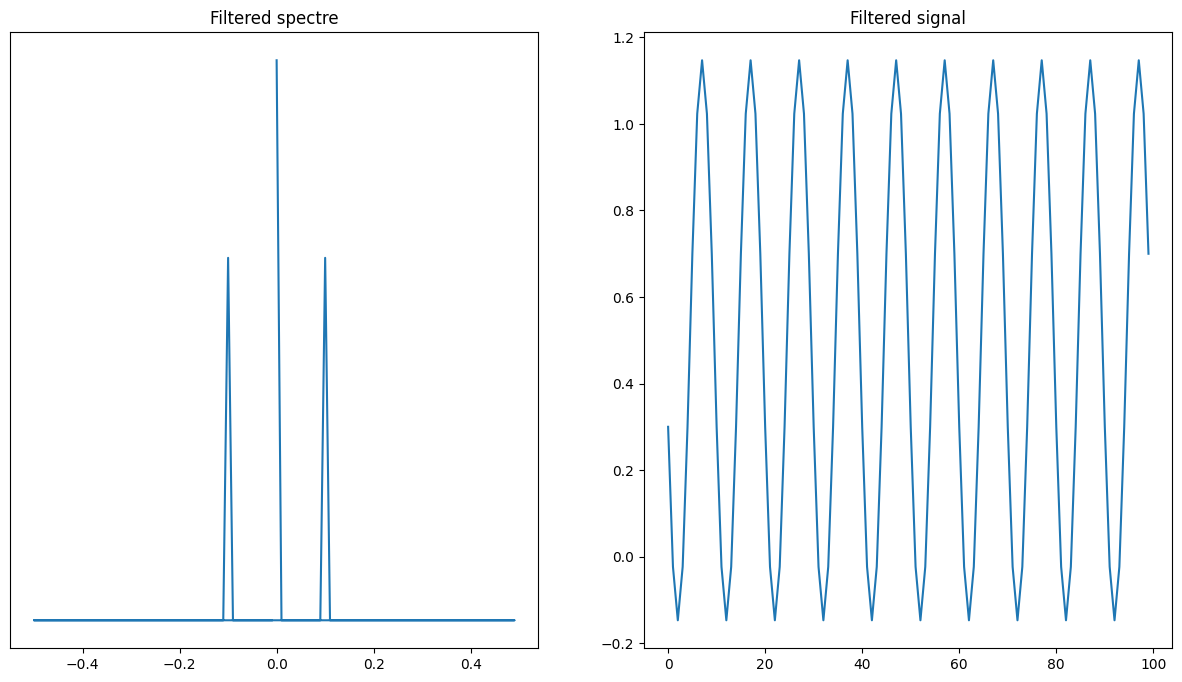

In [75]:
ff = f.copy()

threshold = 0.2

for i in range(len(ff)):
    if abs(fx[i]) > threshold:
        ff[i] = 0

y_rec = np.fft.ifft(ff)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.set_title('Filtered spectre')
ax1.plot(fx, np.abs(ff))
ax1.set_yticks([])
#ax1.set_xlim(-freq_lim,freq_lim)


ax2.plot(x, y_rec) 
ax2.set_title('Filtered signal')

plt.show()

### Задание:

Меняя положение границы частотного фильтра и его вид (фильтр низких частот, высоких частот, полосовой фильтр) изучить изменение результирующего сигнала.

Пример с частотной фильтрацией с помощью библиотеки scipy:

https://stackoverflow.com/questions/19122157/fft-bandpass-filter-in-python

In [77]:
import numpy as np
from scipy.fftpack import rfft, irfft, fftfreq

time   = np.linspace(0,10,2000)
signal = np.cos(5*np.pi*time) + np.cos(7*np.pi*time)

W = fftfreq(signal.size, d=time[1]-time[0])
f_signal = rfft(signal)

# If our original signal time was in seconds, this is now in Hz    
cut_f_signal = f_signal.copy()
cut_f_signal[(W<6)] = 0

cut_signal = irfft(cut_f_signal)

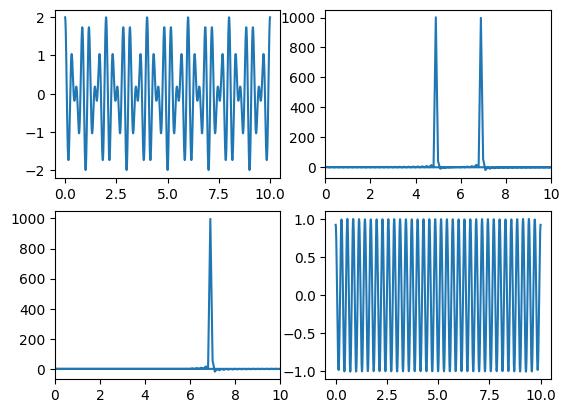

In [79]:
plt.subplot(221)
plt.plot(time,signal)
plt.subplot(222)
plt.plot(W,f_signal)
plt.xlim(0,10)
plt.subplot(223)
plt.plot(W,cut_f_signal)
plt.xlim(0,10)
plt.subplot(224)
plt.plot(time,cut_signal)
plt.show()